## IMPORTING LIBRARYS

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import fetch_california_housing 
from mpl_toolkits.basemap import Basemap
import plotly.express as px

## GETTING DATA

In [2]:
pure_data= fetch_california_housing()  
df=pd.DataFrame(data=pure_data.data,columns=pure_data.feature_names) 
df['MedHouseVal']=pure_data.target 
df=df.sample(frac=1) 
df 
X=df.drop(columns=['MedHouseVal'],axis=1)
y=df['MedHouseVal'] 
df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4042,13.4196,33.0,8.255319,1.029255,1111.0,2.954787,34.15,-118.50,5.00001
3842,2.1977,17.0,2.780576,1.064748,2423.0,4.357914,34.18,-118.44,1.54200
6367,5.5320,47.0,6.345455,0.981818,753.0,2.738182,34.16,-118.01,3.18500
19915,4.2778,16.0,6.188366,0.988920,1150.0,3.185596,36.31,-119.30,0.97300
16927,2.7474,43.0,4.418953,1.052369,1573.0,3.922693,37.58,-122.33,2.33100
...,...,...,...,...,...,...,...,...,...
1562,4.6932,4.0,5.260138,1.100995,2889.0,2.210406,37.76,-121.94,3.56100
151,5.3509,52.0,5.650672,1.028791,1034.0,1.984645,37.81,-122.22,3.02100
2948,0.9288,26.0,4.289216,0.975490,567.0,2.779412,35.32,-118.99,0.36600
4148,3.3326,52.0,3.891626,1.049261,1462.0,3.600985,34.12,-118.20,1.67600


In [3]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4042,13.4196,33.0,8.255319,1.029255,1111.0,2.954787,34.15,-118.50
3842,2.1977,17.0,2.780576,1.064748,2423.0,4.357914,34.18,-118.44
6367,5.5320,47.0,6.345455,0.981818,753.0,2.738182,34.16,-118.01
19915,4.2778,16.0,6.188366,0.988920,1150.0,3.185596,36.31,-119.30
16927,2.7474,43.0,4.418953,1.052369,1573.0,3.922693,37.58,-122.33
...,...,...,...,...,...,...,...,...
1562,4.6932,4.0,5.260138,1.100995,2889.0,2.210406,37.76,-121.94
151,5.3509,52.0,5.650672,1.028791,1034.0,1.984645,37.81,-122.22
2948,0.9288,26.0,4.289216,0.975490,567.0,2.779412,35.32,-118.99
4148,3.3326,52.0,3.891626,1.049261,1462.0,3.600985,34.12,-118.20


In [4]:
y

4042     5.00001
3842     1.54200
6367     3.18500
19915    0.97300
16927    2.33100
          ...   
1562     3.56100
151      3.02100
2948     0.36600
4148     1.67600
10897    1.75000
Name: MedHouseVal, Length: 20640, dtype: float64

In [5]:
df = pd.concat([X,y],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4042,13.4196,33.0,8.255319,1.029255,1111.0,2.954787,34.15,-118.50,5.00001
3842,2.1977,17.0,2.780576,1.064748,2423.0,4.357914,34.18,-118.44,1.54200
6367,5.5320,47.0,6.345455,0.981818,753.0,2.738182,34.16,-118.01,3.18500
19915,4.2778,16.0,6.188366,0.988920,1150.0,3.185596,36.31,-119.30,0.97300
16927,2.7474,43.0,4.418953,1.052369,1573.0,3.922693,37.58,-122.33,2.33100
...,...,...,...,...,...,...,...,...,...
1562,4.6932,4.0,5.260138,1.100995,2889.0,2.210406,37.76,-121.94,3.56100
151,5.3509,52.0,5.650672,1.028791,1034.0,1.984645,37.81,-122.22,3.02100
2948,0.9288,26.0,4.289216,0.975490,567.0,2.779412,35.32,-118.99,0.36600
4148,3.3326,52.0,3.891626,1.049261,1462.0,3.600985,34.12,-118.20,1.67600


## VISUALIZING DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 4042 to 10897
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4042,13.4196,33.0,8.255319,1.029255,1111.0,2.954787,34.15,-118.50,5.00001
3842,2.1977,17.0,2.780576,1.064748,2423.0,4.357914,34.18,-118.44,1.54200
6367,5.5320,47.0,6.345455,0.981818,753.0,2.738182,34.16,-118.01,3.18500
19915,4.2778,16.0,6.188366,0.988920,1150.0,3.185596,36.31,-119.30,0.97300
16927,2.7474,43.0,4.418953,1.052369,1573.0,3.922693,37.58,-122.33,2.33100


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### distribution of target values

/tmp/ipykernel_31449/3098026193.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig=sns.displot(y,palette='pastel')


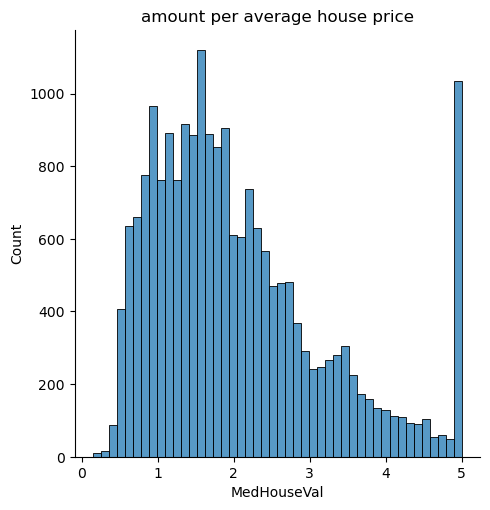

In [10]:
fig=sns.displot(y,palette='pastel') 
plt.title('amount per average house price')  
plt.savefig('./images/distribution-calhousing.png')
plt.show() 

### showing heat map of correlation matrix 

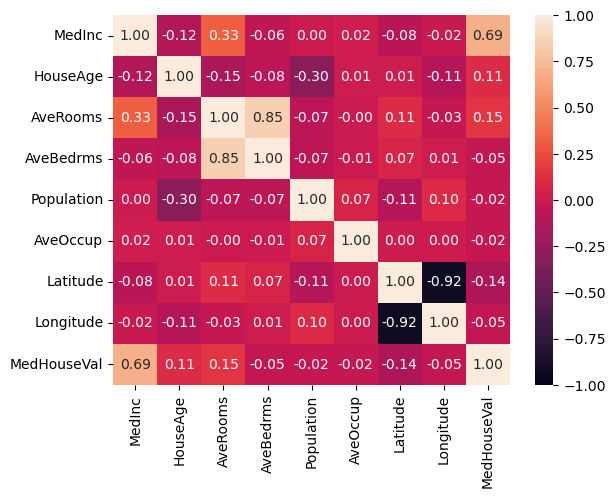

In [11]:
sns.heatmap(data=df.corr(),annot=True, fmt=".2f",mask=None,vmin=-1.0, vmax=1.0)  
plt.savefig('./images/correlation-heat-map.png')
plt.show()

### showing average house price per region

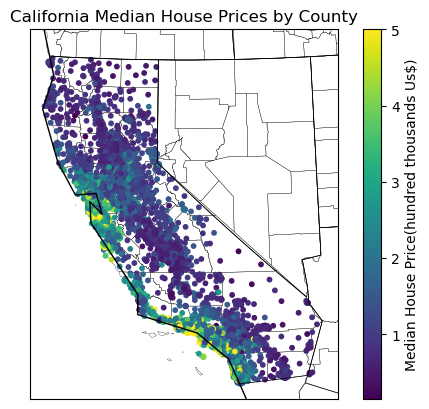

In [12]:
m = Basemap(
    projection='lcc',
    resolution='c',
    lat_0=37.5, lon_0=-119,
    width=1E6, height=1.2E6
)

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawcounties(linewidth=0.2) 

m.scatter(df['Longitude'], df['Latitude'], latlon=True, c=df['MedHouseVal'], cmap='viridis', marker='o', s=10)

plt.colorbar(label='Median House Price(hundred thousands Us$)')

plt.title('California Median House Prices by County')
plt.savefig('./images/medianhouseval-geomap.png')
plt.show()

### dividing prices into periodos

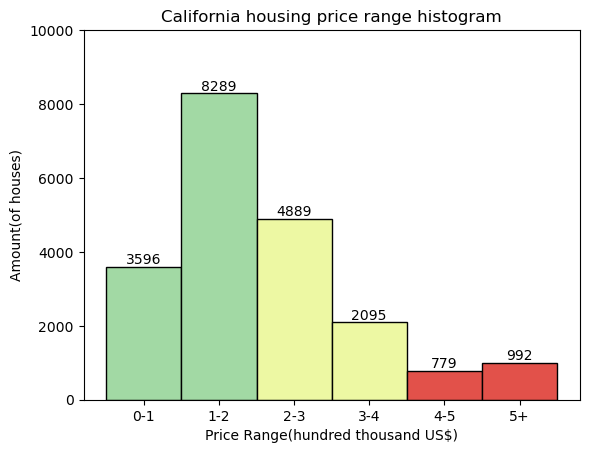

In [13]:
df_periodo=df.copy()
conditions = [
    (df_periodo['MedHouseVal'] >= 0.0) & (df_periodo['MedHouseVal'] < 1.0),
    (df_periodo['MedHouseVal'] >= 1.0) & (df_periodo['MedHouseVal'] < 2.0),
    (df_periodo['MedHouseVal'] >= 2.0) & (df_periodo['MedHouseVal'] < 3.0),
    (df_periodo['MedHouseVal'] >= 3.0) & (df_periodo['MedHouseVal'] < 4.0), 
    (df_periodo['MedHouseVal'] >= 4.0) & (df_periodo['MedHouseVal'] < 5.0), 
    (df_periodo['MedHouseVal'] >= 5.0)
]  
choices = ['0-1', '1-2', '2-3', '3-4','4-5','5+'] 
df_periodo['price_range']=np.select(conditions, choices, default='Error')  
df_periodo['price_range']=pd.Categorical(df_periodo['price_range'], categories=['0-1', '1-2', '2-3', '3-4','4-5','5+'], ordered=True)
cm=sns.color_palette('Spectral')
hist=sns.histplot(data=df_periodo,bins=6,x='price_range')  
hist.set_xlabel('Price Range(hundred thousand US$)') 
hist.set_ylabel('Amount(of houses)')  
plt.title('California housing price range histogram')
bin_order=['0-1', '1-2', '2-3', '3-4','4-5','5+'] 
hist.set_ylim(0,10000)
patches=hist.patches  
for k in range(0,2):
    patches[k].set_facecolor(cm[4]) 
for k in range(2,4): 
    patches[k].set_facecolor(cm[3])
for k in range(4,len(patches)):  
    patches[k].set_facecolor(cm[0]) 
for p in hist.patches:
    height = p.get_height()
    if height > 0:  
        hist.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom')
plt.savefig('./images/California housing price range histogram.png')   
plt.show()  


### reducing dimensions to see scatterplot with tsne

In [14]:
from sklearn.manifold import TSNE
df_tsne_sample=df.sample(frac=0.2) 
X_tsne_sample=df_tsne_sample.drop(columns=['MedHouseVal']) 
y_tsne_sample=df_tsne_sample['MedHouseVal']
tsne=TSNE(n_components=1,random_state=200)  #we apply the random state so that its not different everytime we restar 
array_red=tsne.fit_transform(X_tsne_sample) #applying dimensional reductioon on array  
df_tsne=pd.DataFrame(array_red,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_tsne = df_tsne.reset_index(drop=True)
y_tsne_sample = y_tsne_sample.reset_index(drop=True)
df_tsne

,COMP1
0,63.426945
1,25.922861
2,-13.489931
3,-46.733887
4,-107.036003
...,...
4123,-2.531577
4124,2.798954
4125,-67.820343
4126,121.420990


In [15]:
df_tsne['target']=y_tsne_sample
df_tsne

,COMP1,target
0,63.426945,2.161
1,25.922861,0.833
2,-13.489931,1.396
3,-46.733887,2.871
4,-107.036003,1.844
...,...,...
4123,-2.531577,4.466
4124,2.798954,2.104
4125,-67.820343,1.014
4126,121.420990,1.188


In [16]:
array_red

array([[  63.426945],
       [  25.922861],
       [ -13.489931],
       ...,
       [ -67.82034 ],
       [ 121.42099 ],
       [-126.15072 ]], dtype=float32)

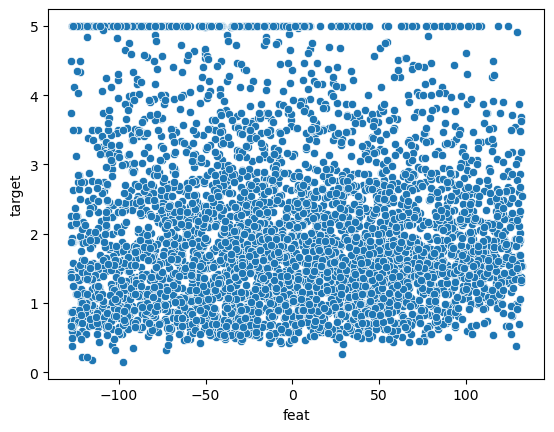

In [17]:
sns.scatterplot(data=df_tsne,x='COMP1',y='target') 
plt.xlabel("feat") 
plt.ylabel("target") 
plt.savefig('./images/dimension-reduction-tsne.png')
plt.show() 

### using dimensiality reduction with PCA

In [18]:
from sklearn.decomposition import PCA   
df_pca_sample=df.sample(frac=0.2) 
X_pca_sample=df_pca_sample.drop(columns=['MedHouseVal']) 
y_pca_sample=df_pca_sample['MedHouseVal']
pca=PCA(n_components=1) 
arrayFeat=pca.fit_transform(X_pca_sample) 
df_pca=pd.DataFrame(arrayFeat,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_pca = df_pca.reset_index(drop=True)
y_pca_sample = y_pca_sample.reset_index(drop=True)
df_pca 

,COMP1
0,1403.121647
1,5153.211054
2,-251.797154
3,-618.826712
4,-858.886552
...,...
4123,-426.816889
4124,-725.778403
4125,2105.236055
4126,898.192432


In [19]:
df_pca['target']=y_pca_sample 
df_pca

,COMP1,target
0,1403.121647,1.769
1,5153.211054,1.500
2,-251.797154,3.407
3,-618.826712,2.833
4,-858.886552,1.823
...,...,...
4123,-426.816889,1.651
4124,-725.778403,2.513
4125,2105.236055,0.569
4126,898.192432,1.960


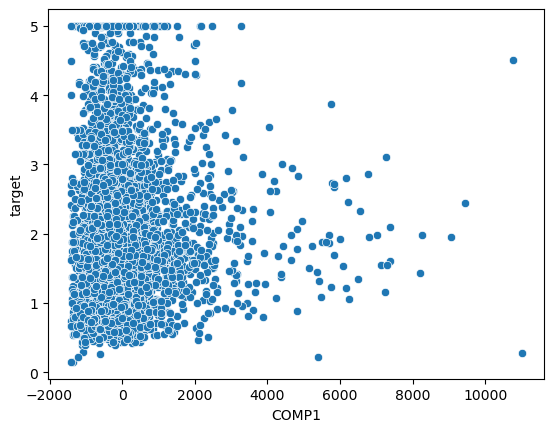

In [20]:
sns.scatterplot(data=df_pca,x='COMP1',y='target')
plt.savefig('./images/dimension-reduction-pca.png')
plt.show()

## SPLITTING DATA

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [22]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16997,6.0350,5.0,5.431472,1.065990,990.0,2.512690,37.54,-122.27
1530,6.5378,34.0,6.696078,0.984594,1879.0,2.631653,37.88,-122.06
13548,1.9286,35.0,4.480663,1.085635,1296.0,3.580110,34.13,-117.31
6707,3.8750,27.0,3.620773,1.028986,755.0,1.823671,34.14,-118.15
19054,2.2888,46.0,5.317865,1.095128,970.0,2.250580,38.16,-121.69
...,...,...,...,...,...,...,...,...
7485,2.5833,37.0,4.158537,0.982927,1839.0,4.485366,33.92,-118.21
19304,5.0323,30.0,6.295265,1.041783,958.0,2.668524,38.35,-122.76
4072,8.1530,36.0,7.580475,1.108179,850.0,2.242744,34.14,-118.47
19415,3.3750,39.0,6.027027,1.000000,92.0,2.486486,37.71,-121.07


In [23]:
y_train

16997    4.38800
1530     3.40900
13548    0.68500
6707     2.58300
19054    0.94900
          ...   
7485     1.32700
19304    2.22400
4072     5.00001
19415    2.12500
19499    1.11500
Name: MedHouseVal, Length: 16512, dtype: float64

In [24]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15489,4.0495,12.0,5.214781,1.053118,1147.0,2.648961,33.14,-117.13
6459,4.8017,39.0,5.669951,1.014778,1590.0,3.916256,34.10,-118.04
2418,3.9844,18.0,6.131004,0.986900,754.0,3.292576,36.60,-119.46
3402,6.2037,32.0,5.345133,0.955752,314.0,2.778761,34.27,-118.35
12752,3.0139,43.0,5.917582,1.093407,447.0,2.456044,38.62,-121.37
...,...,...,...,...,...,...,...,...
17045,8.5184,26.0,6.759542,0.967557,1392.0,2.656489,37.48,-122.27
4566,2.5227,30.0,4.341121,1.112150,763.0,3.565421,34.07,-118.26
8584,7.9611,31.0,6.147059,1.033613,1149.0,2.413866,33.89,-118.40
14088,3.5529,43.0,5.865762,1.072398,1466.0,2.211161,32.76,-117.09


In [25]:
y_test

15489    1.53900
6459     2.73800
2418     1.18100
3402     2.05400
12752    1.15600
          ...   
17045    5.00001
4566     1.87500
8584     5.00001
14088    2.23000
3193     0.52600
Name: MedHouseVal, Length: 4128, dtype: float64

## CREATING MODEL 

In [26]:
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor


In [27]:
# model=DecisionTreeRegressor() 

In [28]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split 
from sklearn.datasets import load_diabetes 
from sklearn.decomposition import PCA  
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import RadiusNeighborsRegressor 
from sklearn.cross_decomposition import PLSCanonical,PLSRegression
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor  
from xgboost import XGBRegressor
def getModels(): 
   return {"LINEAR REGRESSION":LinearRegression(), 
    "RANDOM FOREST":RandomForestRegressor(max_depth=9,min_samples_leaf=4,min_samples_split=8,n_estimators=200),
    "ADA BOOST":AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50), 
    "DECISION TREE":DecisionTreeRegressor(), 
    "SGD":make_pipeline(StandardScaler(),SGDRegressor(alpha= 0.01,eta0= 0.1,learning_rate= 'optimal',loss= 'epsilon_insensitive',max_iter= 100,penalty= 'l1',tol= 0.01)), 
    "KNN":KNeighborsRegressor(algorithm= 'ball_tree', leaf_size= 30, n_neighbors= 10, p= 1, weights= 'distance'),
    "EXTRA TREES":ExtraTreesRegressor(random_state=0,max_depth=6),
    "GRADIENT BOOST":GradientBoostingRegressor(random_state=0) , 
    "XGREGRESSOR":XGBRegressor(colsample_bytree= 0.8,gamma= 0,learning_rate= 0.1,max_depth= 7,n_estimators= 200,reg_alpha= 1,reg_lambda= 10,subsample= 1.0)}

## TRAINING MODEL

In [29]:
# model.fit(X_train,y_train)

In [30]:
models=getModels() 
for i in models.keys(): 
    models[i].fit(X_train,y_train)

""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

print('models loaded') 
models

models loaded


{'LINEAR REGRESSION': LinearRegression(),
 'RANDOM FOREST': RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200),
 'ADA BOOST': AdaBoostRegressor(learning_rate=0.1, loss='exponential'),
 'DECISION TREE': DecisionTreeRegressor(),
 'SGD': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor',
                  SGDRegressor(alpha=0.01, eta0=0.1, learning_rate='optimal',
                               loss='epsilon_insensitive', max_iter=100,
                               penalty='l1', tol=0.01))]),
 'KNN': KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, p=1,
                     weights='distance'),
 'EXTRA TREES': ExtraTreesRegressor(max_depth=6, random_state=0),
 'GRADIENT BOOST': GradientBoostingRegressor(random_state=0),
 'XGREGRESSOR': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsampl

## PREDICTING

In [31]:
scores={} 
predictions={} 
rmse={}  
mse={} 
metrics={}
from sklearn.metrics import mean_squared_error 
for i in models.keys():  
    predictions[i]=models[i].predict(X_test) 
    rmse[i]=mean_squared_error(y_test,predictions[i],squared=True)  
    mse[i]=mean_squared_error(y_test,predictions[i],squared=False) 
    metrics[i]={'MSE':mse[i],'RMSE':rmse[i]}
    scores[i]=rmse[i]


""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

with open('./results/results.txt', 'w') as file:
    # Iterate over dictionary items and write them to the file
    for key, value in metrics.items():
        file.write(f'{key}: {value}\n')
metrics 

{'LINEAR REGRESSION': {'MSE': 0.7355401266068716, 'RMSE': 0.5410192778488527},
 'RANDOM FOREST': {'MSE': 0.5640273954996285, 'RMSE': 0.3181269028740944},
 'ADA BOOST': {'MSE': 0.7579552450612512, 'RMSE': 0.5744961535158615},
 'DECISION TREE': {'MSE': 0.7396094991185945, 'RMSE': 0.5470222111864582},
 'SGD': {'MSE': 0.7558357117596116, 'RMSE': 0.5712876231711587},
 'KNN': {'MSE': 0.9974277279140207, 'RMSE': 0.9948620724117258},
 'EXTRA TREES': {'MSE': 0.7641085570498299, 'RMSE': 0.5838618869567732},
 'GRADIENT BOOST': {'MSE': 0.5445025559547138, 'RMSE': 0.29648303344121624},
 'XGREGRESSOR': {'MSE': 0.45215628167819005, 'RMSE': 0.20444530306104675}}

### getting best parameter for models

#### RANDOM FOREST

In [32]:
# uncomment if you want to find the best parameters for random forest(takes a long long time)
# param_grid = {
#     'n_estimators': [50, 100,200],
#     'max_depth': [5,6,8,9],
#     'min_samples_split': [4,5,8,10],s
#     'min_samples_leaf': [2, 4,6]
# }
# rf = RandomForestRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('grid_search_results.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### ADABOOST

In [33]:
# uncomment if you wanna know the best params for adaboost
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0],  
#     'loss':['linear', 'square', 'exponential']
# }
# adaboost = AdaBoostRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/adaboost-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### KNN 

In [34]:
# uncomment if you wanna know the best params for knn
# param_grid = {
#     'n_neighbors': [3, 5, 7, 10],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2], 
#     'algorithm':['ball_tree', 'kd_tree', 'brute'], 
#     'leaf_size':[30,15,7,40,60,5]
# }
# knn = KNeighborsRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/knn-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### SGD

In [35]:
# uncomment if you wanna know the best params for sgd
# param_grid = {
#     'sgdregressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
#     'sgdregressor__penalty': ['l1', 'l2', 'elasticnet'],
#     'sgdregressor__alpha': [0.0001, 0.001, 0.01],
#     'sgdregressor__learning_rate': ['constant', 'optimal', 'invscaling'],
#     'sgdregressor__eta0': [0.01, 0.1, 0.5],
#     'sgdregressor__tol': [1e-4, 1e-3, 1e-2],
#     'sgdregressor__max_iter': [100, 500, 1000]  
# }
# pipe = make_pipeline(StandardScaler(), SGDRegressor())

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started saving models')
# with open('./parameters/svg-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### XGBOOSTER

In [36]:
# uncomment if you wanna know the best params for xgbooster(takes a REALLY long time)
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 1, 5],
#     'reg_alpha': [0, 1, 10],
#     'reg_lambda': [0, 1, 10]
# }
# xgb_reg = XGBRegressor()
# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started saving models')
# with open('./parameters/xgbooster-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

### comparing each model

In [37]:
# plt.scatter(y_test, y_pred,edgecolor='black')
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.title("True Values vs Predictions in Regression")
# plt.show()

['LINEAR REGRESSION', 'RANDOM FOREST', 'ADA BOOST', 'DECISION TREE', 'SGD', 'KNN', 'EXTRA TREES', 'GRADIENT BOOST', 'XGREGRESSOR']
9


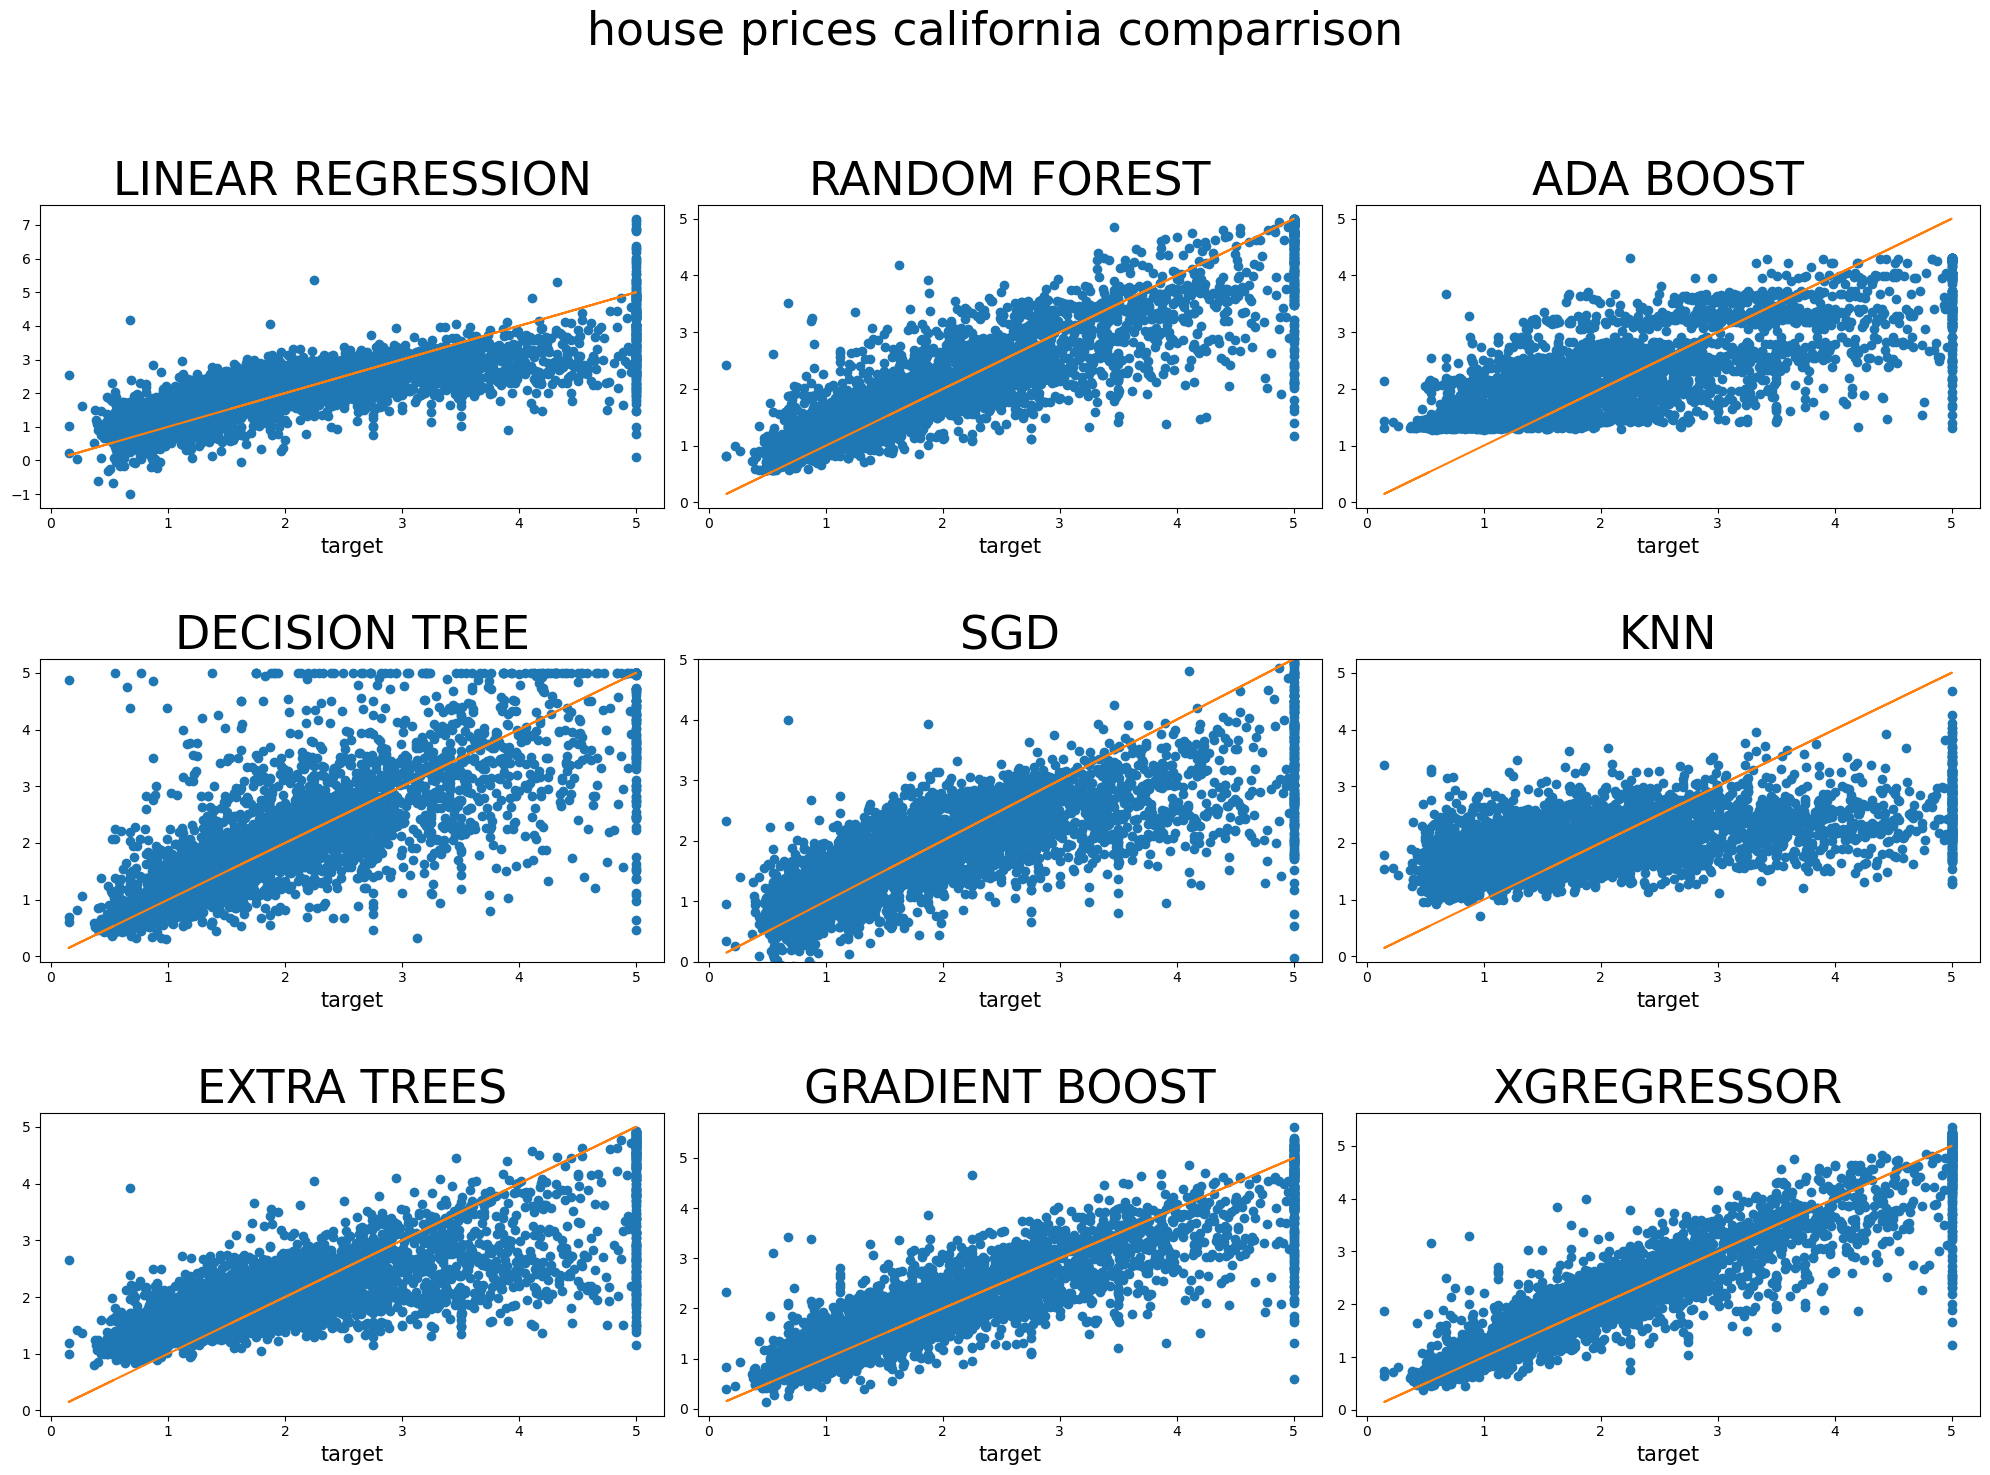

In [38]:
auxdic=scores
auxdic=list(auxdic.items())

fig,ax =plt.subplots(3,3) 
fig.suptitle("house prices california comparrison",size=33)   
fig.set_figwidth(20)
fig.set_figheight(15)
dimX=ax.shape[0] 
dimY=ax.shape[1] 
predictionsList= []
for i in predictions.keys():
    predictionsList.append(predictions[i]) 
predictionsList=np.transpose(predictionsList) 
predictionsList=pd.DataFrame(predictionsList,columns=models.keys())  

#print(predictions)
#predictions=np.transpose(pd.DataFrame(predictions)) 
m_keys=list(models.keys()) 
print(m_keys) 
print(len(m_keys))
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j  
        ax[i,j].plot(y_test,predictions[m_keys[oneDIndex]],"o")  
        ax[i,j].set_title(m_keys[oneDIndex],size=33) 
        ax[i,j].set_xlabel("target",size=15) 
        ax[i,j].set_xbound(lower=0,upper=10)
        if m_keys[oneDIndex] == 'SGD': 
            ax[i,j].set_ybound(lower=0,upper=12) 
            ax[i,j].set_ylim(0,5) 
        m,b=np.polyfit(y_test,y_test,deg=1)
        ax[i,j].plot(y_test,m*y_test+b)
        # centerish=ax[i,j].get_xbound()[1]/2
        # centerishY=ax[i,j].get_ybound()[1]/2
        # ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center")
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5) 
plt.savefig('./images/model-comparrison.png')

### getting residuals

[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]


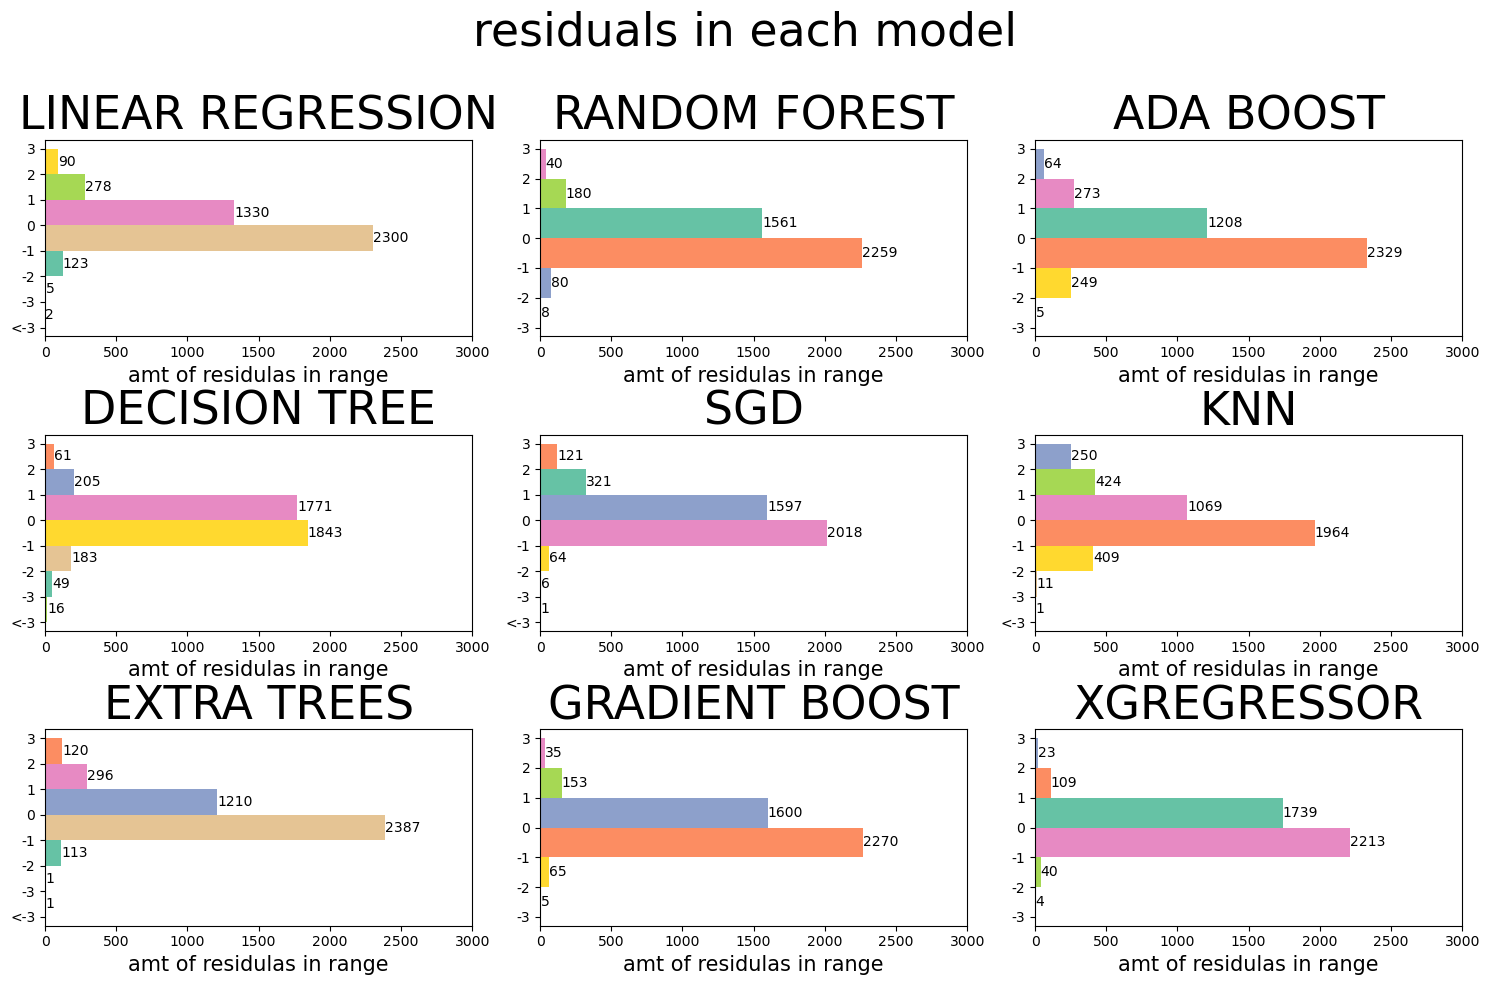

In [44]:
import random as rd
# residuals = y_test - y_pred
# plt.hist(residuals, bins=50)
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Distribution of Residuals in Regression")
# plt.show() 

auxdic=scores
auxdic=list(auxdic.items())
df_residuals=df.copy()
fig,ax =plt.subplots(3,3) 
fig.suptitle("residuals in each model",size=33)   
fig.set_figwidth(15)
fig.set_figheight(10)
dimX=ax.shape[0] 
dimY=ax.shape[1] 
predictionsList= []
residuals_list=[]  
residuals_df={}
for i in predictions.keys():
    predictionsList.append(predictions[i])  
    residuals_list.append(y_test - predictions[i])
predictionsList=np.transpose(predictionsList) 
predictionsList=pd.DataFrame(predictionsList,columns=models.keys())  
residuals_list= np.transpose(residuals_list) 
df_residuals=pd.DataFrame(data=residuals_list, columns=predictions.keys()) 
for pKey in predictions.keys():      
    s_conditions = [ 
        (df_residuals[pKey] < -3),
        (df_residuals[pKey] >= -3) & (df_residuals[pKey] < -2),
        (df_residuals[pKey] >= -2) & (df_residuals[pKey] < -1),
        (df_residuals[pKey] >= -1) & (df_residuals[pKey] < 0),
        (df_residuals[pKey] >= 0) & (df_residuals[pKey] < 1), 
        (df_residuals[pKey] >= 1) & (df_residuals[pKey] < 2), 
        (df_residuals[pKey] >= 2) & (df_residuals[pKey] < 3), 
        (df_residuals[pKey] >= 3) 
    ] 
    s_choices=  [
                    '<-3',
                    '-3',
                    '-2',
                    '-1',
                    '0',
                    '1',
                    '2',
                    '3' 
                ]
    df_residuals[pKey + '_RANGE']=np.select(s_conditions, s_choices, default='Error')  
    df_residuals[pKey + '_RANGE']=pd.Categorical(df_residuals[pKey + '_RANGE'], categories=s_choices, ordered=True,)    
    residuals_df[pKey]=df_residuals.copy()
m_keys=list(models.keys())   
axel=np.zeros(len(m_keys))

for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j   
        patches=[]
        #ax[i,j].plot(y_test,predictions[m_keys[oneDIndex]],"o")  
        residuals = y_test - predictions[m_keys[oneDIndex]]   
        residuals_df[m_keys[oneDIndex]]=residuals_df[m_keys[oneDIndex]].sort_values(by=(m_keys[oneDIndex] + '_RANGE'))
        # new_df=[]
        cm = sns.color_palette('Set2', n_colors=len(residuals_df[m_keys[oneDIndex]][m_keys[oneDIndex] +'_RANGE'].unique()))
        # new_df=pd.DataFrame(df_residuals[m_keys[oneDIndex] +'_RANGE'].value_counts())    
        N, bins, patches=ax[i,j].hist(x=residuals_df[m_keys[oneDIndex]][m_keys[oneDIndex] +'_RANGE'],bins=len(residuals_df[m_keys[oneDIndex]][m_keys[oneDIndex] +'_RANGE'].unique())-1,orientation='horizontal')  
        used=[]
        for k in range(0,len(patches)): 
            index = rd.randint(0,len(patches)-1)   
            height = patches[k].get_width()
            while index == -1  or index in used: 
                index = rd.randint(0,len(patches)-1) 
            used.append(index)  
            patches[k].set_facecolor(cm[index]) 
        for k, rect in enumerate(patches):
            height = rect.get_width()
            if height > 0:
                ax[i, j].text(height, rect.get_y() + rect.get_height() / 2., f'{int(height)}', va='center')
        ax[i, j].set_yticks(range(len(df_residuals[m_keys[oneDIndex] +'_RANGE'].unique())))
        # ax[i, j].set_yticklabels(s_choices[::-1])
        ax[i,j].set_title(m_keys[oneDIndex],size=33) 
        # ax[i,j].set_ylim(0, )
        ax[i,j].set_xlabel("amt of residulas in range",size=15)  
        max_residual = max(abs(residuals)) 
        ax[i, j].set_xlim(0, 3000) 
        print(ax[i,j].get_yticks())
        # ax[i,j].set_xbound(lower=0,upper=10)
        # centerish=ax[i,j].get_xbound()[1]/2
        # centerishY=ax[i,j].get_ybound()[1]/2
        # ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center") 
        
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5) 
plt.savefig('./images/residuals-by-model.png')   
plt.show() 


In [40]:
# df_reserve= pd.DataFrame(df_residuals['XGREGRESSOR_RANGE'].value_counts())  
# sortOrder=  [
#                     '<-3',
#                     '-3',
#                     '-2',
#                     '-1',
#                     '0',
#                     '1',
#                     '2',
#                     '3' 
#                 ] 
# # df_reserve['XGREGRESSOR_RANGE'] = pd.Categorical(df_reserve['XGREGRESSOR_RANGE'], categories=sortOrder, ordered=True)
# df_reserve = df_reserve.sort_values(by='XGREGRESSOR_RANGE')
# df_reserve 

In [41]:
# residuals = y_test - predictions['XGREGRESSOR'] 
# N,bins,patches=plt.hist(df_residuals['XGREGRESSOR_RANGE'],bins=7) 
# for p in patches:
#     height = p.get_height()
#     if height > 0:  
#         plt.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom')
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Distribution of Residuals in XGREGRESSOR")
# plt.show()  
# df_residuals['XGREGRESSOR_RANGE'].value_counts()


In [42]:
# residuals = y_test - predictions['KNN'] 
# df_residuals=df_residuals.sort_values(by=('KNN_RANGE'))

# N,bins,patches=plt.hist(df_residuals['KNN_RANGE'],bins=7) 
# for p in patches:
#     height = p.get_height()
#     if height > 0:  
#         plt.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom')
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Distribution of Residuals in 'KNN")
# plt.show()  

# df_residuals['KNN_RANGE'].value_counts()


In [43]:
# df_residuals['DECISION TREE_RANGE'].value_counts()